In [1]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [15]:
pwd

'/content/drive/My Drive'

In [16]:

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

In [31]:
# Dataset used : https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

ROOT_DATASET_PATH = "Data/"

labels = os.listdir(ROOT_DATASET_PATH)
img_in_class = [len(os.listdir(ROOT_DATASET_PATH+i)) for i in labels]

Text(0.5, 1.0, 'Image count in each class')

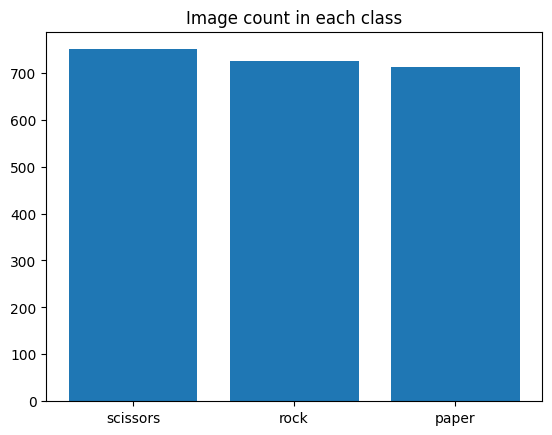

In [18]:
#images in each class
plt.figure()
plt.bar(np.arange(len(labels)),img_in_class)
plt.xticks(np.arange(len(labels)),labels)
plt.title('Image count in each class') 

(-0.5, 299.5, 199.5, -0.5)

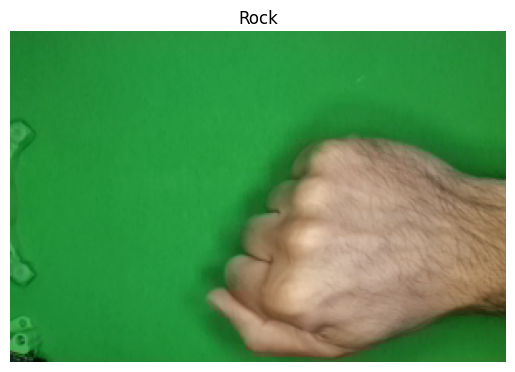

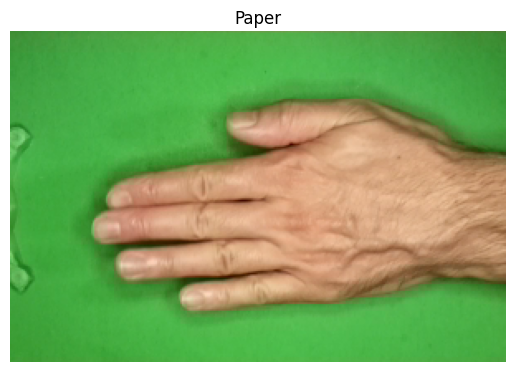

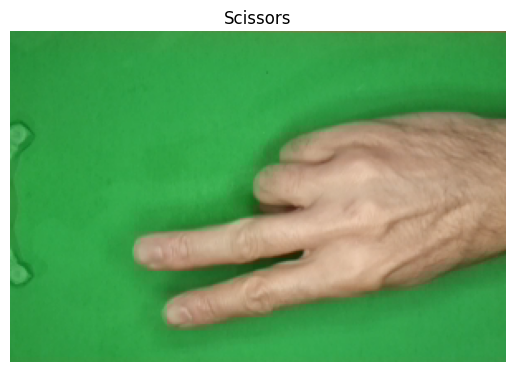

In [19]:
import cv2

rock = cv2.imread(ROOT_DATASET_PATH+'rock/00nKV8oHuTGi20gq.png')
rock = cv2.cvtColor(rock, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(rock)
plt.title('Rock')
plt.axis('off')

paper = cv2.imread(ROOT_DATASET_PATH+'paper/04l5I8TqdzF9WDMJ.png')
paper = cv2.cvtColor(paper, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(paper)
plt.title('Paper')
plt.axis('off')

scissors = cv2.imread(ROOT_DATASET_PATH+'scissors/0657zSfiTYzP2jrl.png')
scissors = cv2.cvtColor(scissors, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(scissors)
plt.title('Scissors')
plt.axis('off')

In [20]:
# Load Dataset to the tf.dataset object
train_image,valida_image = image_dataset_from_directory(ROOT_DATASET_PATH,labels='inferred',
                                                        label_mode='int',color_mode='rgb',
                                                        batch_size=8,image_size=(256, 256),
                                                        shuffle=True,validation_split=0.1,
                                                        subset="both",seed=5)


Found 2188 files belonging to 3 classes.
Using 1970 files for training.
Using 218 files for validation.


In [25]:

model = tf.keras.Sequential()

model.add(layers.Conv2D(32, (5, 5), strides=(1, 1), padding='same', 
                        input_shape=(256,256,3)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, (5, 5), strides=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (5, 5), strides=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.GlobalAvgPool2D())

model.add(layers.Dense(3,activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      2432      
                                                                 
 batch_normalization_6 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 re_lu_4 (ReLU)              (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 64)        51264     
                                                                 
 batch_normalization_7 (Batc  (None, 62, 62, 64)      

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

early = EarlyStopping(monitor='val_accuracy',patience=20,verbose=0,
                      mode='max',restore_best_weights=True,
                      start_from_epoch=20)

history = model.fit(train_image,epochs=100,verbose=True,
                    validation_data=valida_image,
                    callbacks=[early])


Epoch 1/100
247/247 [==============================] - 13s 42ms/step - loss: 0.7353 - accuracy: 0.7640 - val_loss: 1.9649 - val_accuracy: 0.3532
Epoch 2/100
247/247 [==============================] - 10s 39ms/step - loss: 0.5129 - accuracy: 0.8878 - val_loss: 1.2251 - val_accuracy: 0.5826
Epoch 3/100
247/247 [==============================] - 8s 31ms/step - loss: 0.4181 - accuracy: 0.9020 - val_loss: 1.4214 - val_accuracy: 0.4312
Epoch 4/100
247/247 [==============================] - 9s 33ms/step - loss: 0.3376 - accuracy: 0.9259 - val_loss: 0.3730 - val_accuracy: 0.8807
Epoch 5/100
247/247 [==============================] - 9s 38ms/step - loss: 0.2764 - accuracy: 0.9416 - val_loss: 0.5519 - val_accuracy: 0.7936
Epoch 6/100
247/247 [==============================] - 11s 43ms/step - loss: 0.2580 - accuracy: 0.9386 - val_loss: 0.4150 - val_accuracy: 0.8578
Epoch 7/100
247/247 [==============================] - 9s 38ms/step - loss: 0.2086 - accuracy: 0.9518 - val_loss: 0.3891 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 1.0, 'Training loss curve')

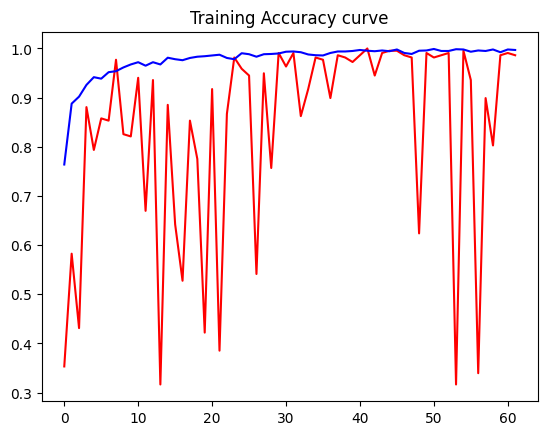

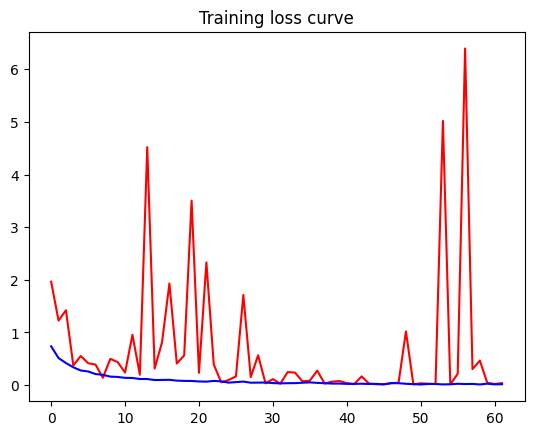

In [30]:
print(history.history.keys())
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
train_loss = history.history['loss']

plt.figure()
plt.plot(val_acc,color='r',label='Validation Accuracy')
plt.plot(train_acc,color='b',label='Train Accuracy')
plt.title("Training Accuracy curve")

plt.figure()
plt.plot(val_loss,color='r',label='Validation Loss')
plt.plot(train_loss,color='b',label='Train Loss')
plt.title("Training loss curve")

1/1 [==============================] - 0s 22ms/step


(-0.5, 299.5, 199.5, -0.5)

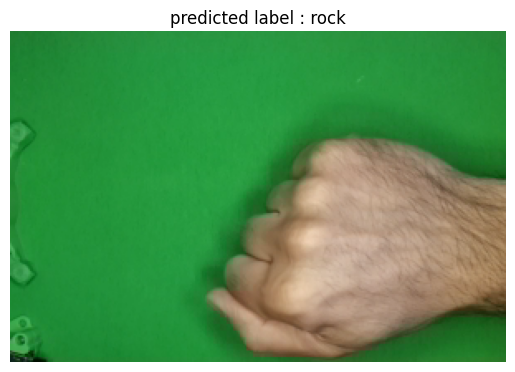

In [36]:
class_names = train_image.class_names

rock = cv2.imread(ROOT_DATASET_PATH+'rock/00nKV8oHuTGi20gq.png')
rock1 = cv2.resize(rock,(256,256))
rock1 = np.expand_dims(rock1,axis=0)
pred = model.predict(rock1)
pred = np.argmax(pred)
rock = cv2.cvtColor(rock, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(rock)
plt.title(f'predicted label : {class_names[pred]}')
plt.axis('off')



1/1 [==============================] - 0s 26ms/step


(-0.5, 299.5, 199.5, -0.5)

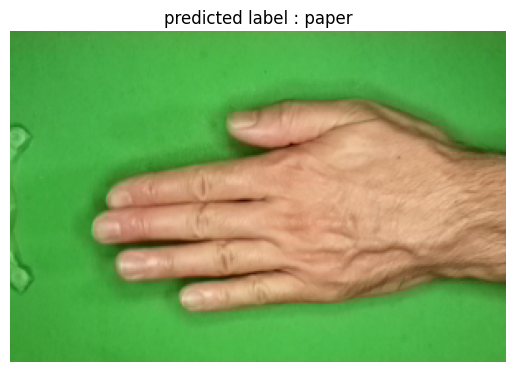

In [37]:

paper = cv2.imread(ROOT_DATASET_PATH+'paper/04l5I8TqdzF9WDMJ.png')

paper1 = cv2.resize(paper,(256,256))
paper1 = np.expand_dims(paper1,axis=0)
pred = model.predict(paper1)
pred = np.argmax(pred)

paper = cv2.cvtColor(paper, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(paper)
plt.title(f'predicted label : {class_names[pred]}')
plt.axis('off')



1/1 [==============================] - 0s 21ms/step


(-0.5, 299.5, 199.5, -0.5)

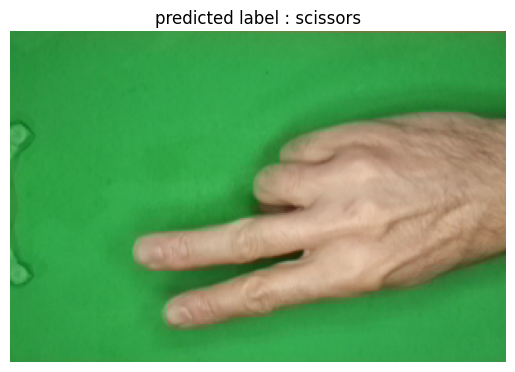

In [38]:

scissors = cv2.imread(ROOT_DATASET_PATH+'scissors/0657zSfiTYzP2jrl.png')
scissors1 = cv2.resize(scissors,(256,256))
scissors1 = np.expand_dims(scissors1,axis=0)
pred = model.predict(scissors1)
pred = np.argmax(pred)
scissors = cv2.cvtColor(scissors, cv2.COLOR_BGR2RGB)
plt.figure()
plt.title(f'predicted label : {class_names[pred]}')
plt.imshow(scissors)
plt.axis('off')